<h1>Preprocess event data for analysis</h1>

by **Alberto Diaz-Durana** 

adiazdurana@gmail.com

Date: 08.02.2021

In [1]:
import pandas as pd
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import emoji # This package is not necessary but it's fun!
import os
from os import walk

# Local folders to store files generated in this notebook 
## run these two lines only if the directories are not in the same folder in which this notebook is running
#os.makedirs('_images') 
#os.makedirs('_data_gen')

print(emoji.emojize("Let's do this!!! :thumbs_up:"))

Let's do this!!! 👍


In [2]:
cwd = os.getcwd()

f = []
for (dirpath, dirnames, filenames) in walk(cwd):
    f.extend(filenames)
    break
    
print(emoji.emojize(f"The current directory 📒 contains the subdirectories{dirnames} and the files :page_with_curl:: {filenames} "))

The current directory 📒 contains the subdirectories['.ipynb_checkpoints', '_data_gen', '_images'] and the files 📃: ['ADD-Preprocess event data for analysis.html', 'ADD-Preprocess event data for analysis.ipynb', 'Example MIX TYPES.txt', 'packagesADD.yml', 'Process event data for analysis.pdf', 'README.md'] 


First we will import the file Example MIX TYPES.txt and have a look at what we have.

In [3]:
fn = 'Example MIX TYPES.txt'
data = pd.read_csv(fn, sep='\t')
data.head(10)

TransID                            ActivityName         Time eLetter_Type  \
0        1                                 Request     0.000000       Type_1   
1        1                                 Request   600.000000       Type_1   
2        1                                   Start   600.000000       Type_1   
3        1                                   Start   600.000000       Type_1   
4        1                     Schedule Activities   600.000000       Type_1   
5        1                     Schedule Activities  2062.294853       Type_1   
6        1  Broadcast Request for Related Articles  2062.294853       Type_1   
7        1  Broadcast Request for Related Articles  2962.294853       Type_1   
8        1                                   Delay  2962.294853       Type_1   
9        2                                 Request  7200.000000       Type_2   

   eLetter_ID  ShapeID  ShapeNumber  OK_After_Review_14_perc  \
0           1      767            1                      100   
1           1      767            1                      100   
2           1     1376            2                      100   
3           1     1376            2                      100   
4           1       15            3                      100   
5           1       15            3                      100   
6           1      194            5                      100   
7           1      194            5                      100   
8           1     1022            6                      100   
9           2      767            1                       80   

   OK_After_Review_17_perc  OK_After_Review_25_perc  ...  \
0                      100                      100  ...   
1                      100                      100  ...   
2                      100                      100  ...   
3                      100                      100  ...   
4                      100                      100  ...   
5                      100                      100  ...   
6                      100                      100  ...   
7                      100                      100  ...   
8                      100                      100  ...   
9                       85                       25  ...   

  Paste_In_Template_STD  Preempt  Priority  Pull_Target_List_MAX  \
0                    10    False         0                     2   
1                    10    False         0                     2   
2                    10    False         0                     2   
3                    10    False         0                     2   
4                    10    False         0                     2   
5                    10    False         0                     2   
6                    10    False         0                     2   
7                    10    False         0                     2   
8                    10    False         0                     2   
9                    10    False         0                     2   

   Pull_Target_List_MIN  Review_13_AVG  Review_13_STD  Review_16_AVG  \
0                     1             30             15             30   
1                     1             30             15             30   
2                     1             30             15             30   
3                     1             30             15             30   
4                     1             30             15             30   
5                     1             30             15             30   
6                     1             30             15             30   
7                     1             30             15             30   
8                     1             30             15             30   
9                     1             30             15             30   

   Review_16_STD  Send_On  
0             15       10  
1             15       10  
2             15       10  
3             15       10  
4             15       10  
5             15       10  
6             15  

In [4]:
data.to_csv('_data_gen/_data.csv', sep='\t') #to visualize the complete table in Excel and to play around with the values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3267 entries, 0 to 3266
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TransID                   3267 non-null   int64  
 1   ActivityName              3267 non-null   object 
 2   Time                      3267 non-null   float64
 3   eLetter_Type              3267 non-null   object 
 4   eLetter_ID                3267 non-null   int64  
 5   ShapeID                   3267 non-null   int64  
 6   ShapeNumber               3267 non-null   int64  
 7   OK_After_Review_14_perc   3267 non-null   int64  
 8   OK_After_Review_17_perc   3267 non-null   int64  
 9   OK_After_Review_25_perc   3267 non-null   int64  
 10  ProcessName               3267 non-null   object 
 11  Analyze_Criteria_AVG      3267 non-null   int64  
 12  Analyze_Criteria_STD      3267 non-null   int64  
 13  Create_Initial_Draft_MAX  3267 non-null   int64  
 14  Create_I

In [5]:
print('{} has {} rows and {} columns.'.format(fn, data.shape[0], data.shape[1]))

Example MIX TYPES.txt has 3267 rows and 37 columns.


# Task 1: Understanding the data

The **eLetter_ID** is the case identifier  and the **ActivityName** is the activity. 

## Question: How many events do we have?

According to the description given in the assigment, each event has to have at least a case identifier
(**eLetter_ID** in the data), a name of the activity that has been executed (ActivityName), a start and a complete
timestamp (which will be calculated later on in this notebook). Optionally, an event can have an arbitrary number of attributes (variables or columns in the DataFrame). 

In [6]:
# Visualize the list of any event in a column
numberOfEvents = len(data['Time'])

In [7]:
print(emoji.emojize(f"The the Event Log :page_with_curl: has total number of {numberOfEvents} events (rows)."))

The the Event Log 📃 has total number of 3267 events (rows).


## Question: How many events do we have for each activity name?

To obtain the number of events for each activity name we have to count the number of observations of case identifiers for each ActivityName.  

In [10]:
data.groupby('ActivityName')['eLetter_ID'].count()

ActivityName
 Create Initial Draft                     125
Analyze Criteria                          108
Broadcast Request for Related Articles    164
Change                                      4
Create Initial Target List                118
Create Proof                              117
Delay                                     152
End                                       102
Gather Materials                          140
Internal Review And Changes               137
Modify Criteria                            22
OK?                                       352
Optimize Graphics                         136
Outline Text, Targeting, and URLs         190
Paste In Template                         134
Pull Target List                          106
Request                                   176
Review                                    247
Schedule Activities                       176
Send Email                                161
Send On                                   114
Send To Production   

## Question: How many cases do we have?

The number of cases is the ammount of unique case identifiers.

In [11]:
print(emoji.emojize(f"The number of cases is {data['eLetter_ID'].nunique()} :books:"))

The number of cases is 88 📚


## Question: There’s an ​eLetter_Type​ attribute. What values does it have and how often do they occur?

In [10]:
print(emoji.emojize(f"The values in the eLetter_Type column are {data['eLetter_Type'].unique().tolist()} :ledger:")) 

The values in the eLetter_Type column are ['Type_1', 'Type_2', 'Type_4'] 📒


In [11]:
# The number of occurences (how often?) of each eLetter_Type attribute are:
data.groupby(['eLetter_Type'])[['TransID']].count()

TransID
eLetter_Type         
Type_1           1598
Type_2            901
Type_4            768

# Task 2: Transforming the data into an event log

## Calculating the timestamps for each row

Our client provided the fix point time indicating the time stamp at which all begins (the genesis 😄). It’s the 01.01.2016 10:00:00

In [12]:
fixPointTime = pd.Timestamp(2016, 1, 1, 10)
fixPointTime

Timestamp('2016-01-01 10:00:00')

The variable 'timeStamp' is obtained by adding the Time from the attribute 'Time' to the variable fixPointTime

In [13]:
data['timeStamp'] = fixPointTime + pd.to_timedelta(data['Time'], unit='s')
data['timeStamp']

0      2016-01-01 10:00:00.000000
1      2016-01-01 10:10:00.000000
2      2016-01-01 10:10:00.000000
3      2016-01-01 10:10:00.000000
4      2016-01-01 10:10:00.000000
                  ...            
3262   2016-01-31 00:52:24.198348
3263   2016-01-31 00:54:36.096105
3264   2016-01-31 00:54:36.096105
3265   2016-01-31 01:46:48.605888
3266   2016-01-31 01:46:48.605888
Name: timeStamp, Length: 3267, dtype: datetime64[ns]

In [14]:
#data.dtypes

## Combining two subsequent rows for the same activity into one with start and complete timestamp

A first step in preparing the event log is to calculate the relative time of each event, which is time the event occurs with respect to the beginning of the process.

In [15]:
# Create a pivot table of the start (minimum) and end (maximum) timestamps associated with each case:
case_starts_ends = data.pivot_table(index=['TransID','ActivityName'], aggfunc={'timeStamp': ['min', 'max']})
case_starts_ends = case_starts_ends.reset_index() 
case_starts_ends.columns = ['TransID','ActivityName', 'caseEnd', 'caseStart']

In [16]:
# Merge with the main event log data so that for each row we have the start and end times.
data = data.merge(case_starts_ends, on=['TransID','ActivityName']) 

Now we inspect the DataFrame to check on the new start and end timestamps.

In [17]:
data[['TransID','ActivityName', 'timeStamp','Time','caseEnd', 'caseStart']].head(20) 

TransID                            ActivityName  \
0         1                                 Request   
1         1                                 Request   
2         1                                   Start   
3         1                                   Start   
4         1                     Schedule Activities   
5         1                     Schedule Activities   
6         1  Broadcast Request for Related Articles   
7         1  Broadcast Request for Related Articles   
8         1                                   Delay   
9         1                                   Delay   
10        2                                 Request   
11        2                                 Request   
12        2                                   Start   
13        2                                   Start   
14        2                     Schedule Activities   
15        2                     Schedule Activities   
16        2  Broadcast Request for Related Articles   
17        2  Broadcast Request for Related Articles   
18        2                                   Delay   
19        2                                   Delay   

                    timeStamp          Time                    caseEnd  \
0  2016-01-01 10:00:00.000000      0.000000 2016-01-01 10:10:00.000000   
1  2016-01-01 10:10:00.000000    600.000000 2016-01-01 10:10:00.000000   
2  2016-01-01 10:10:00.000000    600.000000 2016-01-01 10:10:00.000000   
3  2016-01-01 10:10:00.000000    600.000000 2016-01-01 10:10:00.000000   
4  2016-01-01 10:10:00.000000    600.000000 2016-01-01 10:34:22.294853   
5  2016-01-01 10:34:22.294853   2062.294853 2016-01-01 10:34:22.294853   
6  2016-01-01 10:34:22.294853   2062.294853 2016-01-01 10:49:22.294853   
7  2016-01-01 10:49:22.294853   2962.294853 2016-01-01 10:49:22.294853   
8  2016-01-01 10:49:22.294853   2962.294853 2016-01-01 18:39:23.936862   
9  2016-01-01 18:39:23.936862  31163.936862 2016-01-01 18:39:23.936862   
10 2016-01-01 12:00:00.000000   7200.000000 2016-01-01 12:10:00.000000   
11 2016-01-01 12:10:00.000000   7800.000000 2016-01-01 12:10:00.000000   
12 2016-01-01 12:10:00.000000   7800.000000 2016-01-01 12:10:00.000000   
13 2016-01-01 12:10:00.000000   7800.000000 2016-01-01 12:10:00.000000   
14 2016-01-01 12:10:00.000000   7800.000000 2016-01-01 12:26:22.455046   
15 2016-01-01 12:26:22.455046   8782.455046 2016-01-01 12:26:22.455046   
16 2016-01-01 12:26:22.455046   8782.455046 2016-01-01 12:41:22.455046   
17 2016-01-01 12:41:22.455046   9682.455046 2016-01-01 12:41:22.455046   
18 2016-01-01 12:41:22.455046   9682.455046 2016-01-01 19:48:41.041293   
19 2016-01-01 19:48:41.041293  35321.041293 2016-01-01 19:48:41.041293   

                    caseStart  
0  2016-01-01 10:00:00.000000  
1  2016-01-01 10:00:00.000000  
2  2016-01-01 10:10:00.000000  
3  2016-01-01 10:10:00.000000  
4  2016-01-01 10:10:00.000000  
5  2016-01-01 10:10:00.000000  
6  2016-01-01 10:34:22.294853  
7  2016-01-01 10:34:22.294853  
8  2016-01-01 10:49:22.294853  
9  2016-01-01 10:49:22.294853  
10 2016-01-01 12:00:00.000000  
11 2016-01-01 12:00:00.000000  
12 2016-01-01 12:10:00.000000  
13 2016-01-01 12:10:00.000000  
14 2016-01-01 12:10:00.000000  
15 2016-01-01 12:10:00.000000  
16 2016-01-01 12:26:22.455046  
17 2016-01-01 12:26:22.455046  
18 2016-01-01 12:41:22.455046  
19 2016-01-01 12:41:22.455046

Notice that the values in ActivityName are still doubled for each values in TransID.
The next step is to eliminate the duplicas leaving the rows showing the relative time relativeTime_s.

In [18]:
dataT = data.drop_duplicates(subset = ['TransID','ActivityName'], keep='last').reset_index(drop=True)

In [19]:
dataT[['TransID','ActivityName', 'caseStart','caseEnd']].head(10)

TransID                            ActivityName                  caseStart  \
0        1                                 Request 2016-01-01 10:00:00.000000   
1        1                                   Start 2016-01-01 10:10:00.000000   
2        1                     Schedule Activities 2016-01-01 10:10:00.000000   
3        1  Broadcast Request for Related Articles 2016-01-01 10:34:22.294853   
4        1                                   Delay 2016-01-01 10:49:22.294853   
5        2                                 Request 2016-01-01 12:00:00.000000   
6        2                                   Start 2016-01-01 12:10:00.000000   
7        2                     Schedule Activities 2016-01-01 12:10:00.000000   
8        2  Broadcast Request for Related Articles 2016-01-01 12:26:22.455046   
9        2                                   Delay 2016-01-01 12:41:22.455046   

                     caseEnd  
0 2016-01-01 10:10:00.000000  
1 2016-01-01 10:10:00.000000  
2 2016-01-01 10:34:22.294853  
3 2016-01-01 10:49:22.294853  
4 2016-01-01 18:39:23.936862  
5 2016-01-01 12:10:00.000000  
6 2016-01-01 12:10:00.000000  
7 2016-01-01 12:26:22.455046  
8 2016-01-01 12:41:22.455046  
9 2016-01-01 19:48:41.041293

# Task 3: Checking the transformed data

In [20]:
dataT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TransID                   1565 non-null   int64         
 1   ActivityName              1565 non-null   object        
 2   Time                      1565 non-null   float64       
 3   eLetter_Type              1565 non-null   object        
 4   eLetter_ID                1565 non-null   int64         
 5   ShapeID                   1565 non-null   int64         
 6   ShapeNumber               1565 non-null   int64         
 7   OK_After_Review_14_perc   1565 non-null   int64         
 8   OK_After_Review_17_perc   1565 non-null   int64         
 9   OK_After_Review_25_perc   1565 non-null   int64         
 10  ProcessName               1565 non-null   object        
 11  Analyze_Criteria_AVG      1565 non-null   int64         
 12  Analyze_Criteria_STD

## Answer the questions from section I again for the transformed data

### Question: How many events do we have?

In [21]:
# Visualize the list of any event in a column
numberOfEventsT = len(dataT['Time'])

In [22]:
print(emoji.emojize(f"The the Event Log :page_with_curl: has now total number of {numberOfEventsT} events (rows) after the transformation."))
print(emoji.emojize(f"We can compare to a total number of {numberOfEvents} events (rows) it had before the transformation."))

The the Event Log 📃 has now total number of 1565 events (rows) after the transformation.
We can compare to a total number of 3267 events (rows) it had before the transformation.


### Question: How many events do we have for each activity name?

We count the number of observations of case identifiers for each ActivityName after the transformation.

In [23]:
dataT.groupby('ActivityName')['TransID'].count()

ActivityName
 Create Initial Draft                      63
Analyze Criteria                           55
Broadcast Request for Related Articles     88
Change                                      2
Create Initial Target List                 63
Create Proof                               59
Delay                                      76
End                                        51
Gather Materials                           76
Internal Review And Changes                62
Modify Criteria                            11
OK?                                       112
Optimize Graphics                          61
Outline Text, Targeting, and URLs         127
Paste In Template                          61
Pull Target List                           53
Request                                    88
Review                                     59
Schedule Activities                        88
Send Email                                110
Send On                                    57
Send To Production   

### Question: How many cases do we have?

In [24]:
print(emoji.emojize(f"The number of cases for the transformed data is {dataT['TransID'].nunique()} :books:"))

The number of cases for the transformed data is 151 📚


### Question: There’s an ​eLetter_Type​ attribute. What values does it have and how often do they occur?

In [25]:
print(emoji.emojize(f"The values in the eLetter_Type column for the transformed data are {dataT['eLetter_Type'].unique().tolist()} :ledger:")) 

The values in the eLetter_Type column for the transformed data are ['Type_1', 'Type_2', 'Type_4'] 📒


In [26]:
# The number of occurences (how often?) of each eLetter_Type attribute are:
dataT.groupby(['eLetter_Type'])[['TransID']].count()

TransID
eLetter_Type         
Type_1            781
Type_2            406
Type_4            378

In [27]:
pd.crosstab(dataT['ActivityName'], dataT['eLetter_Type']).sort_values(by=['Type_1'], ascending=False)

eLetter_Type                            Type_1  Type_2  Type_4
ActivityName                                                  
Outline Text, Targeting, and URLs           63      32      32
OK?                                         57      28      27
Send Email                                  56      28      26
Schedule Activities                         44      22      22
Request                                     44      22      22
Start                                       44      22      22
Broadcast Request for Related Articles      44      22      22
Delay                                       38      19      19
Gather Materials                            38      19      19
Optimize Graphics                           31      16      14
Create Initial Target List                  31      16      16
Paste In Template                           31      16      14
Internal Review And Changes                 31      16      15
 Create Initial Draft                       31      16      16
Create Proof                                30      15      14
Review                                      30      15      14
Send On                                     29      15      13
Analyze Criteria                            28      14      13
Send To Production                          28      14      13
Pull Target List                            27      13      13
End                                         26      13      12
Modify Criteria                              0      11       0
Change                                       0       2       0

In [28]:
fig = px.bar(dataT, x='ActivityName', y='eLetter_Type')
fig.show()

## Calculate the difference between start and complete time for each event and show the distribution

We can verify that the values in caseStart and in caseEnd were obtained by adding the values in Time to the variable fixPointTime by calculating the relative time between events. 

In [29]:
# Calculate the relative time by subtracting the process start time from the event timestamp
dataT['relativeTime'] = dataT['timeStamp'] - dataT['caseStart']

In [30]:
# Convert relative times to seconds to compare with the attribute Time
dataT['relativeTime_s'] = dataT['relativeTime'].dt.seconds + 86400*dataT['relativeTime'].dt.days 

In [31]:
dataT.loc[650:670,['TransID','ActivityName', 'Time','caseEnd','caseStart','relativeTime_s']]


TransID                            ActivityName          Time  \
650       56                                   Delay  9.986799e+05   
651       42                       Optimize Graphics  1.580302e+06   
652       66                                   Start  9.726000e+05   
653       66                     Schedule Activities  9.736958e+05   
654       57                                   Delay  9.958692e+05   
655       66  Broadcast Request for Related Articles  1.297431e+06   
656       59                                   Delay  1.002509e+06   
657       58                      Send To Production  9.746477e+05   
658       40                                 Send On  9.750153e+05   
659       58                        Analyze Criteria  1.215643e+06   
660       40                              Send Email  1.296650e+06   
661       60                      Send To Production  9.760083e+05   
662       55                              Send Email  1.384622e+06   
663       60                        Analyze Criteria  1.221098e+06   
664       41                       Paste In Template  9.799451e+05   
665       62                                   Delay  1.002550e+06   
666       47       Outline Text, Targeting, and URLs  9.784083e+05   
667       42                       Paste In Template  1.583900e+06   
668       61                      Send To Production  9.779868e+05   
669       61                        Analyze Criteria  1.222459e+06   
670       47                    Create Initial Draft  1.217425e+06   

                       caseEnd                  caseStart  relativeTime_s  
650 2016-01-12 23:24:39.942867 2016-01-12 16:00:29.849801           26650  
651 2016-01-19 16:58:21.821436 2016-01-12 16:04:51.690925          608010  
652 2016-01-12 16:10:00.000000 2016-01-12 16:10:00.000000               0  
653 2016-01-12 16:28:15.839854 2016-01-12 16:10:00.000000            1095  
654 2016-01-12 22:37:49.245274 2016-01-12 16:15:29.849801           22939  
655 2016-01-16 10:23:50.671186 2016-01-12 16:28:15.839854          323734  
656 2016-01-13 00:28:28.514177 2016-01-12 16:30:29.849801           28678  
657 2016-01-12 16:44:07.729100 2016-01-12 16:39:07.729100             300  
658 2016-01-12 16:50:15.251711 2016-01-12 16:40:15.251711             600  
659 2016-01-15 11:40:42.853685 2016-01-12 16:44:07.729100          240995  
660 2016-01-16 10:10:49.937815 2016-01-12 16:50:15.251711          321634  
661 2016-01-12 17:06:48.322180 2016-01-12 17:01:48.322180             300  
662 2016-01-17 10:37:01.986196 2016-01-12 17:06:08.561697          408653  
663 2016-01-15 13:11:37.756386 2016-01-12 17:06:48.322180          245089  
664 2016-01-12 18:12:25.131146 2016-01-12 17:15:13.404552            3431  
665 2016-01-13 00:29:10.050702 2016-01-12 17:21:48.322180           25641  
666 2016-01-12 17:46:48.322180 2016-01-12 17:31:48.322180             900  
667 2016-01-19 17:58:20.213844 2016-01-12 17:34:21.225642          606238  
668 2016-01-12 17:39:46.815648 2016-01-12 17:34:46.815648             300  
669 2016-01-15 13:34:19.375406 2016-01-12 17:39:46.815648          244472  
670 2016-01-15 12:10:24.621152 2016-01-12 17:46:48.322180          239016

Notice that 

+ fixPointTime (the genesis 😉) = timeStamp(row) = caseStart(row), when row = 0
+ relativeTime_s(0) + relativeTime_s(1) + relativeTime_s(2) = Time(2), specific example
+ relativeTime_s(0) + relativeTime_s(1) + ... + relativeTime_s(row) = Time(row)
+ timeStamp(row) + relativeTime_s(row) = caseEnd(row)

In [32]:
dataT.to_csv('_data_gen/_dataTransformed.csv', sep='\t') #to visualize the complete table in Excel and to play around with the values

In [33]:
dataT['relativeTime_s'].describe()

count    1.565000e+03
mean     5.167660e+04
std      1.179131e+05
min      0.000000e+00
25%      3.000000e+02
50%      2.700000e+03
75%      4.990200e+04
max      1.098863e+06
Name: relativeTime_s, dtype: float64

<AxesSubplot:xlabel='Entry number', ylabel='Time in seconds'>

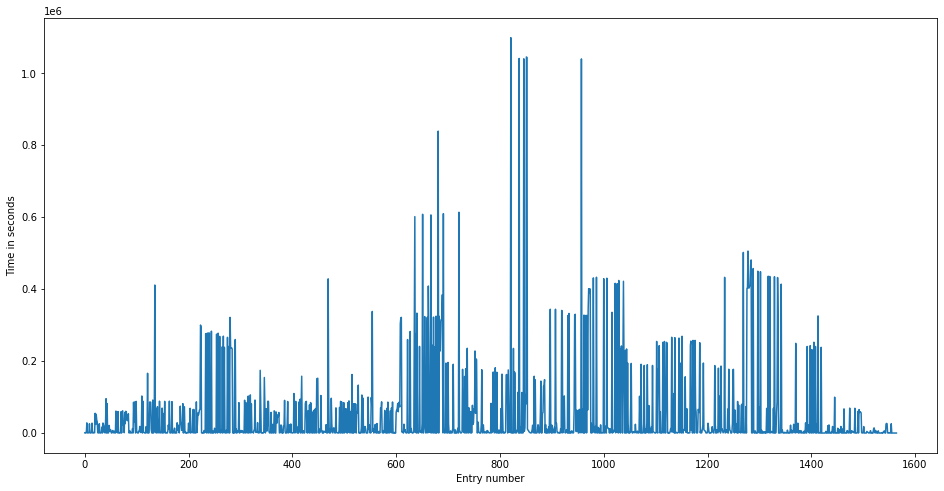

In [34]:
plt.figure(figsize = (16,8))
plt.xlabel("Entry number")
plt.ylabel("Time in seconds")
dataT['relativeTime_s'].plot()

## (Optional): Surprise us with something interesting you found in the data :-)

In [35]:
fig = px.box(dataT, x="ActivityName", y="relativeTime_s", color="eLetter_Type")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

Filtering events  

One final thing will want to look at is which events are shared by all processes and which are not, since in process mining it is the non-shared differentiating events that we are interested in.

The following activities are common to all cases: 
The following activities are not common to all cases:  Create Initial Draft, Analyze Criteria, Broadcast Request for Related Articles, Change, Create Initial Target List, Create Proof, Delay, End, Gather Materials, Internal Review And Changes, Modify Criteria, OK?, Optimize Graphics, Outline Text, Targeting, and URLs, Paste In Template, Pull Target List, Request, Review, Schedule Activities, Send Email, Send On, Send To Production, Start


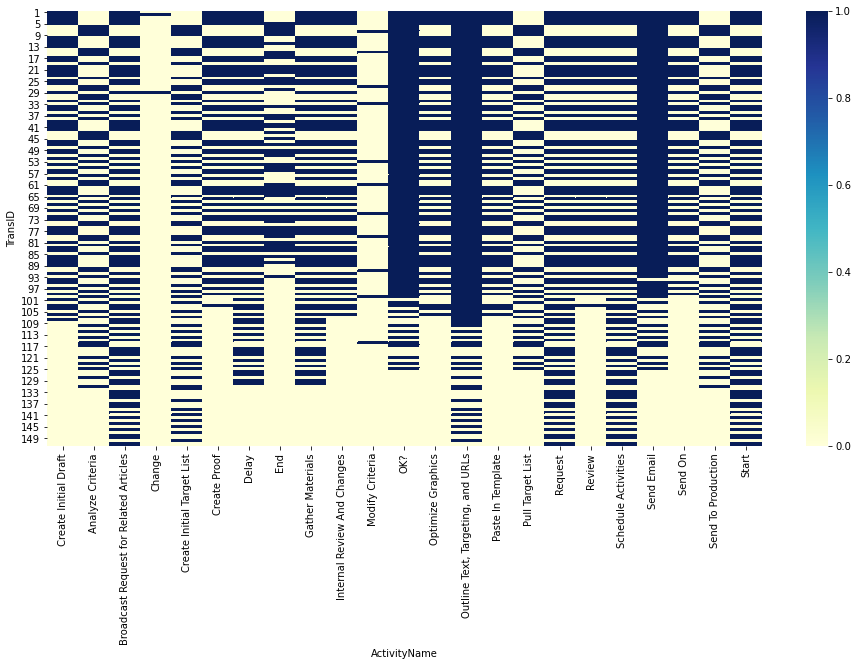

In [36]:
## Create a table giving the number of cases in which each event is present.
dataT_events = pd.crosstab(dataT['TransID'], dataT['ActivityName']) ## Visualise in a heatmap

plt.figure(figsize = (16,8))
sns.heatmap(dataT_events, cmap="YlGnBu")## Calculate the number of unique event counts 

## This should be 1 for events which are shared by all TransID.
nunique = dataT_events.apply(pd.Series.nunique) ## Identify the events which are shared by all 
sharedActivities = nunique[nunique==1].index 
activitiesToKeep = nunique[nunique>1].index 

print('The following activities are common to all cases: {}'.format(', '.join(sharedActivities))) 
print('The following activities are not common to all cases: {}'.format(', '.join(activitiesToKeep)))

In [37]:
print(emoji.emojize(f"All activities are not common to all cases :exploding_head:"))

All activities are not common to all cases 🤯


## (Super Bonus): Penguins 🐧 in Twitter!

The selected package is twint from https://github.com/twintproject/twint to scrape and to store the tweets in a .json file for each day the process has been running.

To install and be able to run the package in this notebook we will clone the repository as explained in the url above. 

In [38]:
import twint
import nest_asyncio
from datetime import datetime
nest_asyncio.apply()
print(twint.__version__)

2.1.20


### Scrapin' Twitter (this could take about 4 hours!)

Uncomment the cell in this subchapter if you would like to to the entire process of scrapping the tweets and placing them in a folder called "penguin". The scrapped tweets in a day will be stored in a json file with the date as filename.

The cell below creates several functions to automate the process of searching over several days and storing each day’s results as distinct json file: twint_loop splits the date range into a series of days and calls twint_search to do the searching for each date. Each json is named after the date and stored in a directory based on the search term, using clean_name to ensure that it is a valide directory name. The date loop

In [39]:
# Credits to Neal Caren for the functions!
# Scraping has to be done only once!
# All files are available in the folder "penguin"

from datetime import timedelta
from string import ascii_letters, digits
from os import mkdir, path
'''
def clean_name(dirname):
    valid = set(ascii_letters + digits)
    return ''.join(a for a in dirname if a in valid)


def twint_search(searchterm, since, until, json_name):
 


    #Twint search for a specific date range.
    #Stores results to json.

    
    c = twint.Config()
    c.Search = searchterm
    c.Since = since
    c.Until = until
    c.Hide_output = True
    c.Store_json = True
    c.Output = json_name
    c.Debug = True

    try:
        twint.run.Search(c)    
    except (KeyboardInterrupt, SystemExit):
        raise
    except:
        print("Problem with %s." % since)




def twint_loop(searchterm, since, until):

    dirname = clean_name(searchterm)
    try:
    # Create target Directory
        mkdir(dirname)
        print("Directory" , dirname ,  "Created ")
    except FileExistsError:
        print("Directory" , dirname ,  "already exists")

    daterange = pd.date_range(since, until)

    for start_date in daterange:

        since= start_date.strftime("%Y-%m-%d")
        until = (start_date + timedelta(days=1)).strftime("%Y-%m-%d")

        json_name = '%s.json' % since
        json_name = path.join(dirname, json_name)

        print('Getting %s ' % since )
        twint_search(searchterm, since, until, json_name)
'''

'\ndef clean_name(dirname):\n    valid = set(ascii_letters + digits)\n    return \'\'.join(a for a in dirname if a in valid)\n\n\ndef twint_search(searchterm, since, until, json_name):\n \n\n\n    #Twint search for a specific date range.\n    #Stores results to json.\n\n    \n    c = twint.Config()\n    c.Search = searchterm\n    c.Since = since\n    c.Until = until\n    c.Hide_output = True\n    c.Store_json = True\n    c.Output = json_name\n    c.Debug = True\n\n    try:\n        twint.run.Search(c)    \n    except (KeyboardInterrupt, SystemExit):\n        raise\n    except:\n        print("Problem with %s." % since)\n\n\n\n\ndef twint_loop(searchterm, since, until):\n\n    dirname = clean_name(searchterm)\n    try:\n    # Create target Directory\n        mkdir(dirname)\n        print("Directory" , dirname ,  "Created ")\n    except FileExistsError:\n        print("Directory" , dirname ,  "already exists")\n\n    daterange = pd.date_range(since, until)\n\n    for start_date in datera

In [40]:
'''
#The list the contents of the new directory confirms that it worked.
# This function ingests the all the json files found in the directory "penguin" created with the functions above.
from glob import glob
glob(path.join('penguin','*.json'))'''

'\n#The list the contents of the new directory confirms that it worked.\n# This function ingests the all the json files found in the directory "penguin" created with the functions above.\nfrom glob import glob\nglob(path.join(\'penguin\',\'*.json\'))'

In [41]:
'''
# Now we loop over the DataFrame using the start and end date of each event.
for index, row in data.iterrows():
    twint_loop('#penguin', row['caseStart'], row['caseEnd'])'''

"\n# Now we loop over the DataFrame using the start and end date of each event.\nfor index, row in data.iterrows():\n    twint_loop('#penguin', row['caseStart'], row['caseEnd'])"

In [42]:
'''
#Finally, the separate data files can be combined into a single dataframe.
file_names = glob(path.join('penguin','*.json'))
dfs = [pd.read_json(fn, lines = True) for fn in file_names]
penguins_df = pd.concat(dfs)

penguins_df.info()'''

"\n#Finally, the separate data files can be combined into a single dataframe.\nfile_names = glob(path.join('penguin','*.json'))\ndfs = [pd.read_json(fn, lines = True) for fn in file_names]\npenguins_df = pd.concat(dfs)\n\npenguins_df.info()"

### Dowloading a csv with the scrapped tweets (a faster workaround!)

Comment the cell in this subchapter if you would like to run the cells above and see how twitter gets scrapped!

If you decide to use this workaround, a csv file will be downloaded from a url and stored into a DataFrame.

In [43]:
penguins_df = pd.read_csv("https://www.dropbox.com/s/np78fr2kwcp19bw/penguins_df.csv?dl=1")

### Sentiment analysis

In [44]:
tweets_only = penguins_df['tweet']

In [45]:
from textblob import TextBlob

In [46]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_only]

sentiment_objects[0].polarity, sentiment_objects[0]


(0.5,
 TextBlob("I just couldn't resist!  #cute #penguin #lighting #victoriacentre #Nottingham  https://t.co/2l2qZpUKvE"))

The next cell takes about 5 minutes... So let't go get a cup of tea ☕

In [47]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.5,
 "I just couldn't resist!  #cute #penguin #lighting #victoriacentre #Nottingham  https://t.co/2l2qZpUKvE"]

In [48]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head(20)

polarity                                              tweet
0   0.500000  I just couldn't resist!  #cute #penguin #light...
1   0.000000  Disco penguins #Georgetown #DC #Christmas #hap...
2   0.000000  Newport Aquarium today! #penguin 🐧 @ Newport A...
3   0.500000  #review #Penguin #Run is one of the many #andr...
4   0.250000  🐧Who was the Penguins favorite relative? Aunt-...
5   0.000000           @robinlordtaylor  miss Gotham! #Penguin♡
6   0.108333  The Boys... Together. Awwww.... I wanna go to ...
7   0.000000  #rico #ricothepenguin #penguinsofmadagascar #g...
8   0.000000  #buschgardens #tampa #florida #zoo #animals #p...
9   0.485227  Happy New Years everyone! #art #illustration #...
10  0.000000  #penguin #happynewyears #2016  https://t.co/Cx...
11  0.235606  Light up the new year with our new #DIY #Pengu...
12  0.000000  My goal for today was to see penguins. Objecti...
13  0.000000  Hawk shoes.  Penguin socks.  #iowa #penguin  h...
14  0.000000  Percy Penguin has joined the family!! Thank yo...
15  0.400000  A cute #penguin to start the #newyear with a #...
16  0.000000  Club #Penguin #August #2013 #Furniture #Catalo...
17  0.000000  #penguin #seaworldorlando #penguino  https://t...
18  0.000000  Origami\rDay one\r#penguin 🐧 #origami  https:/...
19  0.000000  #HappyNewYear2016 #FamilyMoments #FunnyFaces #...

In [49]:
sentiment_df.head(20).sort_values(by=['polarity'], ascending=True)

polarity                                              tweet
19  0.000000  #HappyNewYear2016 #FamilyMoments #FunnyFaces #...
14  0.000000  Percy Penguin has joined the family!! Thank yo...
13  0.000000  Hawk shoes.  Penguin socks.  #iowa #penguin  h...
12  0.000000  My goal for today was to see penguins. Objecti...
10  0.000000  #penguin #happynewyears #2016  https://t.co/Cx...
18  0.000000  Origami\rDay one\r#penguin 🐧 #origami  https:/...
7   0.000000  #rico #ricothepenguin #penguinsofmadagascar #g...
8   0.000000  #buschgardens #tampa #florida #zoo #animals #p...
5   0.000000           @robinlordtaylor  miss Gotham! #Penguin♡
17  0.000000  #penguin #seaworldorlando #penguino  https://t...
2   0.000000  Newport Aquarium today! #penguin 🐧 @ Newport A...
1   0.000000  Disco penguins #Georgetown #DC #Christmas #hap...
16  0.000000  Club #Penguin #August #2013 #Furniture #Catalo...
6   0.108333  The Boys... Together. Awwww.... I wanna go to ...
11  0.235606  Light up the new year with our new #DIY #Pengu...
4   0.250000  🐧Who was the Penguins favorite relative? Aunt-...
15  0.400000  A cute #penguin to start the #newyear with a #...
9   0.485227  Happy New Years everyone! #art #illustration #...
3   0.500000  #review #Penguin #Run is one of the many #andr...
0   0.500000  I just couldn't resist!  #cute #penguin #light...

These polarity values can be plotted in a histogram, which can help to highlight in the overall sentiment (i.e. more positivity or negativity) toward the subject.

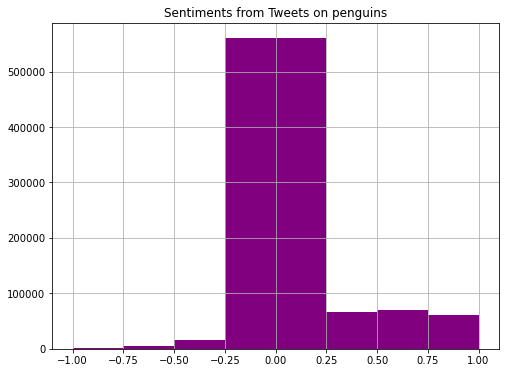

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on penguins")
plt.show()


In [51]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]


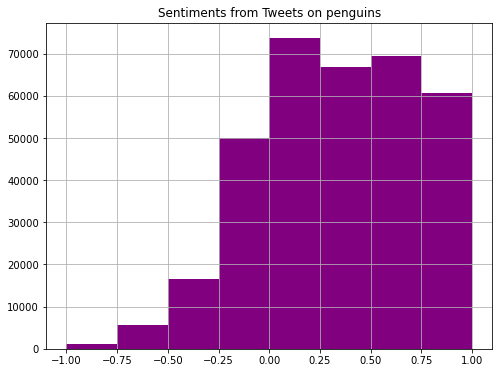

In [52]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on penguins")
plt.show()


This plot displays a revised histogram of polarity values for tweets on penguins. For this histogram polarity values equal to zero have been removed to better highlight the distribution of polarity values.

### Frequency analysis

Let's have a look now at the frequency of mentions per date according to the DataFrame we have just now generated.

In [53]:
dates = pd.to_datetime(penguins_df.date, cache=True) 
times = pd.to_timedelta(penguins_df.time)
penguins_df['datetime'] = pd.DataFrame(dates + times)
penguins_df['datetime']

0        2016-01-02 00:45:42
1        2016-01-02 00:29:50
2        2016-01-02 00:29:28
3        2016-01-01 23:41:15
4        2016-01-01 23:17:57
                 ...        
780563   2016-01-31 15:07:51
780564   2016-01-31 15:07:48
780565   2016-01-31 15:01:15
780566   2016-01-31 14:50:27
780567   2016-01-31 14:50:00
Name: datetime, Length: 780568, dtype: datetime64[ns]

In [54]:
row=10
mask=(penguins_df["datetime"] >= dataT.loc[row,'caseStart']) & (penguins_df["datetime"] <= dataT.loc[row,'caseEnd'])
p_m = penguins_df[mask]
len(p_m)

46

In [55]:
penguinCounts = []
for index, row in dataT.iterrows():
    mask =(penguins_df["datetime"] >= row['caseStart']) & (penguins_df["datetime"] <= row['caseEnd'])
    penguinCount = len(penguins_df[mask])
    penguinCounts.append(penguinCount)     

In [56]:
penguinCounts_df = pd.DataFrame(penguinCounts)
penguinCounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1565 non-null   int64
dtypes: int64(1)
memory usage: 12.4 KB


In [57]:
dataT['penguinCounts'] = penguinCounts_df

### Distribution of penguin counts after assigning to events

<AxesSubplot:>

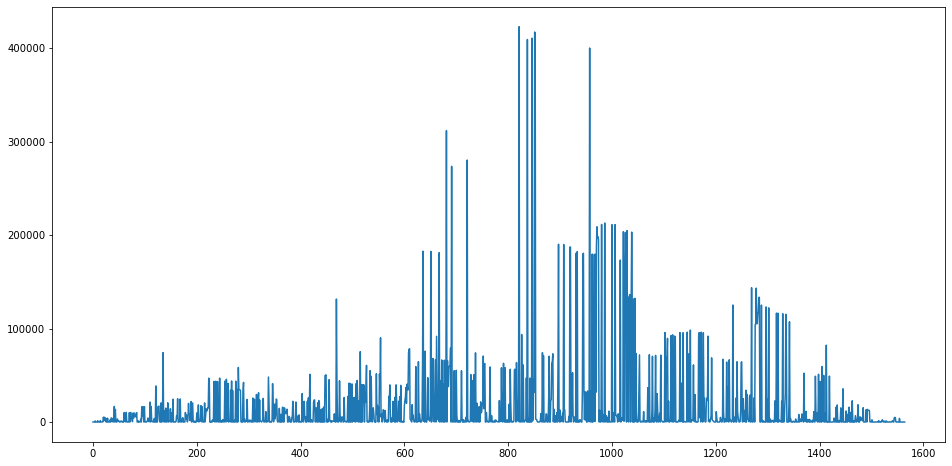

In [58]:
plt.figure(figsize = (16,8))
dataT['penguinCounts'].plot()

In [59]:
fig = px.scatter(dataT, x="penguinCounts", y="relativeTime_s")
fig.show()

In [60]:
fig = px.scatter(dataT, x="penguinCounts", y="ActivityName")
fig.show()

In [61]:
dataT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   TransID                   1565 non-null   int64          
 1   ActivityName              1565 non-null   object         
 2   Time                      1565 non-null   float64        
 3   eLetter_Type              1565 non-null   object         
 4   eLetter_ID                1565 non-null   int64          
 5   ShapeID                   1565 non-null   int64          
 6   ShapeNumber               1565 non-null   int64          
 7   OK_After_Review_14_perc   1565 non-null   int64          
 8   OK_After_Review_17_perc   1565 non-null   int64          
 9   OK_After_Review_25_perc   1565 non-null   int64          
 10  ProcessName               1565 non-null   object         
 11  Analyze_Criteria_AVG      1565 non-null   int64          
 12  Analyz

# (Just curious) Visualizing the process with pm4py

You can then represent this model with a petri net and visualise it with the pm4py visualizer object from pm4py.visualization.petrinet.

In [62]:
dataPM = dataT[['TransID','ActivityName','eLetter_Type','timeStamp']]
dataPM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   TransID       1565 non-null   int64         
 1   ActivityName  1565 non-null   object        
 2   eLetter_Type  1565 non-null   object        
 3   timeStamp     1565 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 49.0+ KB


In [63]:
dataPM = dataPM.rename(columns={'timeStamp': 'time:timestamp', 
'TransID': 'case:concept:name', 'ActivityName': 'concept:name', 'eLetter_Type': 'org:resource'})

In [64]:
dataPM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   case:concept:name  1565 non-null   int64         
 1   concept:name       1565 non-null   object        
 2   org:resource       1565 non-null   object        
 3   time:timestamp     1565 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 49.0+ KB


In [65]:
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.log import case_statistics
from pm4py.algo.filtering.log.attributes import attributes_filter

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner

# viz
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.objects.conversion.dfg import converter as dfg_mining

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [66]:
## Convert to log format 
log = log_converter.apply(dataPM)

Before applying one of the many process mining algorithms, it will be informative if we get some numbers describing our log and process. We will start by understanding: how many variants we have? how many cases in each variant?

A **process variant** is a unique path from the very beginning to the very end of the process

In [67]:
variants = variants_filter.get_variants(log)
print(f"We have:{len(variants)} variants in our log")

We have:16 variants in our log


In [68]:
## Let's try to understand how many cases do those variants have?

variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)
variants_count ## Printing the top 5 variants by case number

[{'variant': 'Request,Start,Schedule Activities,Broadcast Request for Related Articles,Delay,Gather Materials,Outline Text, Targeting, and URLs, Create Initial Draft,Internal Review And Changes,Optimize Graphics,Paste In Template,Review,OK?,Create Proof,Send On,Send Email,End',
  'count': 32},
 {'variant': 'Outline Text, Targeting, and URLs,Create Initial Target List,Send To Production,Analyze Criteria,OK?,Pull Target List,Send Email',
  'count': 27},
 {'variant': 'Request,Start,Schedule Activities,Broadcast Request for Related Articles,Delay,Gather Materials,Outline Text, Targeting, and URLs, Create Initial Draft,Internal Review And Changes,Optimize Graphics,Paste In Template,Review,OK?,Create Proof,Send On,Send Email',
  'count': 23},
 {'variant': 'Outline Text, Targeting, and URLs,Create Initial Target List,Send To Production,Analyze Criteria,OK?,Pull Target List,Send Email,End',
  'count': 15},
 {'variant': 'Request,Start,Schedule Activities,Broadcast Request for Related Articles,D

In [69]:
variant_count_df = pd.DataFrame(variants_count)
variant_count_df

variant  count
0   Request,Start,Schedule Activities,Broadcast Re...     32
1   Outline Text, Targeting, and URLs,Create Initi...     27
2   Request,Start,Schedule Activities,Broadcast Re...     23
3   Outline Text, Targeting, and URLs,Create Initi...     15
4   Request,Start,Schedule Activities,Broadcast Re...     12
5   Request,Start,Schedule Activities,Broadcast Re...     12
6   Outline Text, Targeting, and URLs,Create Initi...      8
7   Outline Text, Targeting, and URLs,Create Initi...      7
8   Outline Text, Targeting, and URLs,Create Initi...      4
9   Request,Start,Schedule Activities,Broadcast Re...      2
10  Request,Start,Schedule Activities,Broadcast Re...      2
11  Request,Start,Schedule Activities,Broadcast Re...      2
12  Outline Text, Targeting, and URLs,Create Initi...      2
13  Request,Start,Schedule Activities,Broadcast Re...      1
14  Request,Start,Schedule Activities,Broadcast Re...      1
15  Request,Start,Schedule Activities,Broadcast Re...      1

In [70]:
variant_count_df_sum = variant_count_df.loc[0,'count'] + variant_count_df.loc[2,'count'] + variant_count_df.loc[9,'count']
variant_count_df_sum

57

In [71]:
print(f"Out of {len(log)} cases we have in our log, {variant_count_df_sum} of them (i.e {round(variant_count_df_sum/len(log)*100)}%) are in 1 variant.\nOnly 1 variant out of {len(variants)}.")

Out of 151 cases we have in our log, 57 of them (i.e 38.0%) are in 1 variant.
Only 1 variant out of 16.


In [72]:
## Let's see what activities do we have in log? including their frequencies and considering all cases(no filter)

activities = attributes_filter.get_attribute_values(log, "concept:name")
activities_df = pd.DataFrame(activities, index=['freq']).T.sort_values(by=['freq'], ascending=False)
activities_df

freq
Outline Text, Targeting, and URLs        127
OK?                                      112
Send Email                               110
Request                                   88
Schedule Activities                       88
Broadcast Request for Related Articles    88
Start                                     88
Delay                                     76
Gather Materials                          76
 Create Initial Draft                     63
Create Initial Target List                63
Internal Review And Changes               62
Optimize Graphics                         61
Paste In Template                         61
Review                                    59
Create Proof                              59
Send On                                   57
Send To Production                        55
Analyze Criteria                          55
Pull Target List                          53
End                                       51
Modify Criteria                           11
Change                                     2

Few activities stands out they have a lot of actions, it could be some sort of self-loop or rework or some other reason.

## Alpha Miner

The starting point for the Alpha algorithm are ordering relations (sorted by timestamp ofc) So, we do not consider the frequencies nor we consider other attributes!

In [73]:
## Import the alpha_miner algorithm
net, initial_marking, final_marking = alpha_miner.apply(log)


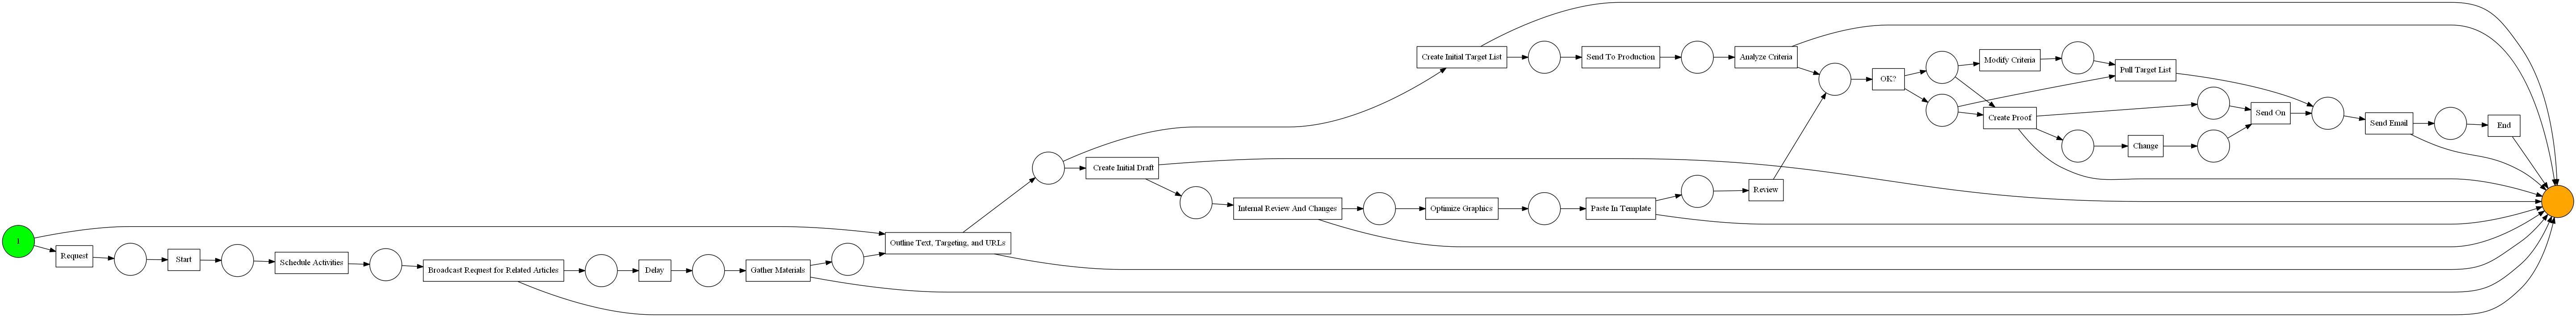

In [74]:
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)
pn_visualizer.save(gviz,"_images/alpha_miner_petri_net.png")

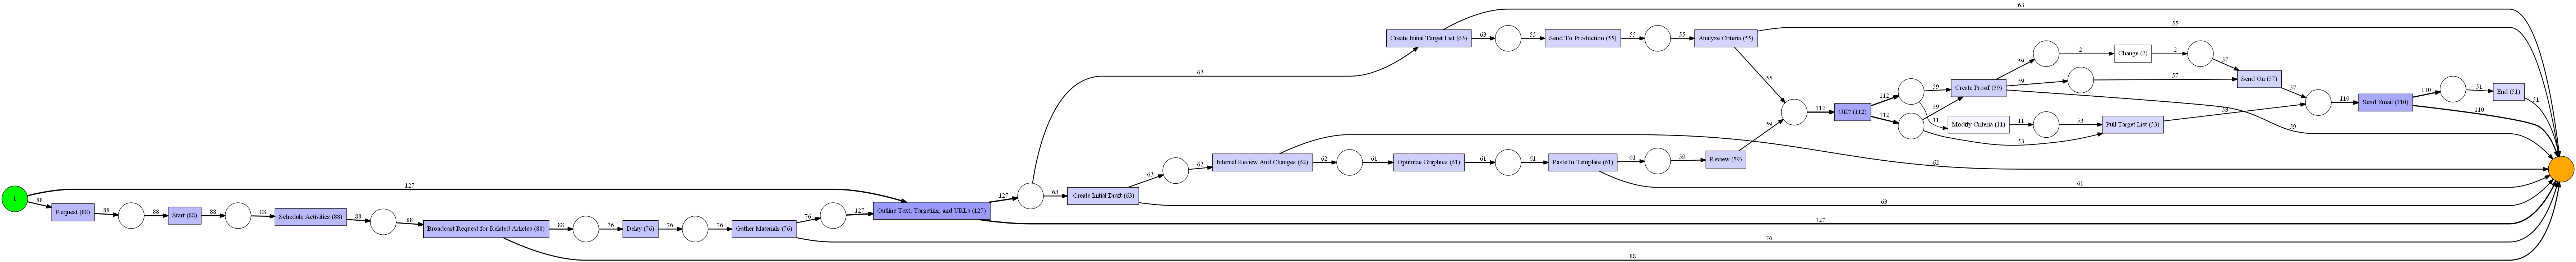

In [75]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking,
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=log)
pn_visualizer.view(gviz)
pn_visualizer.save(gviz, "_images/alpha_miner_petri_net_freq.png")

## DFG - Direct flows graph with frequency and time between the edges

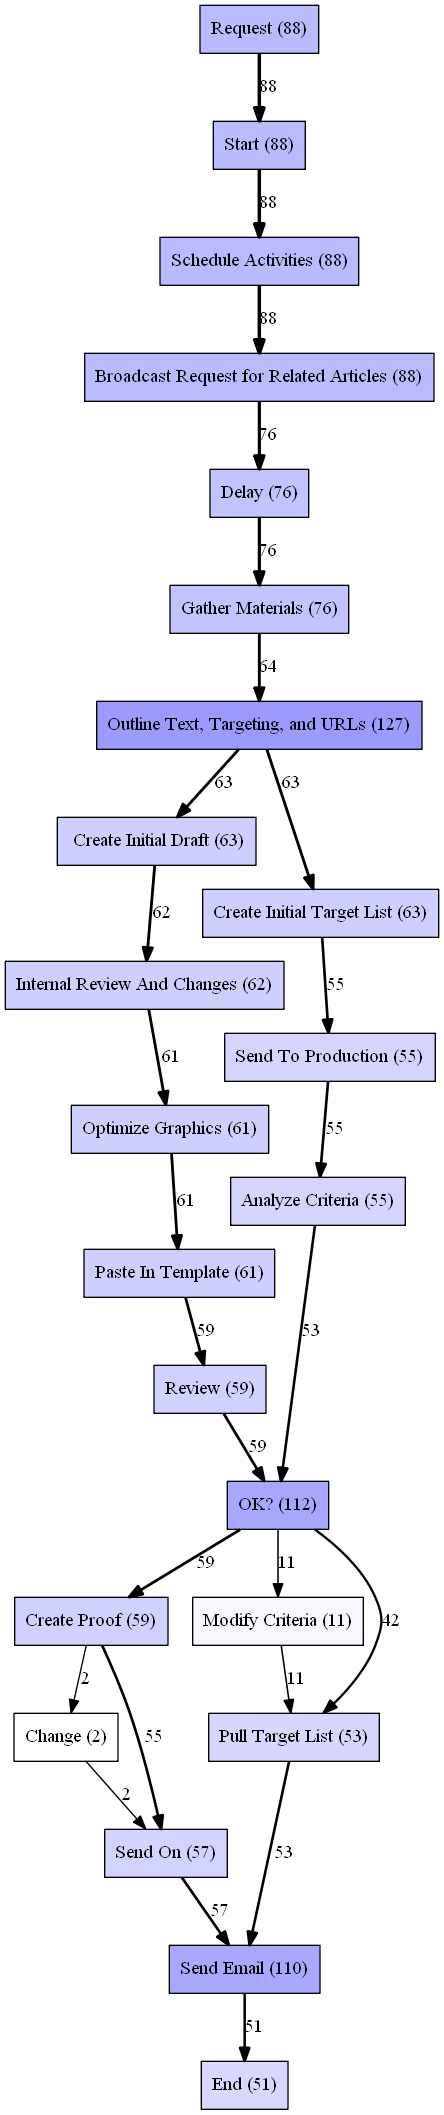

In [76]:
#Create graph from log
dfg = dfg_discovery.apply(log)

gviz = dfg_visualization.apply(dfg, log=log, 
                               variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)
dfg_visualization.save(gviz, "_images/Direct flows graph with frequency and time between the edges.png")

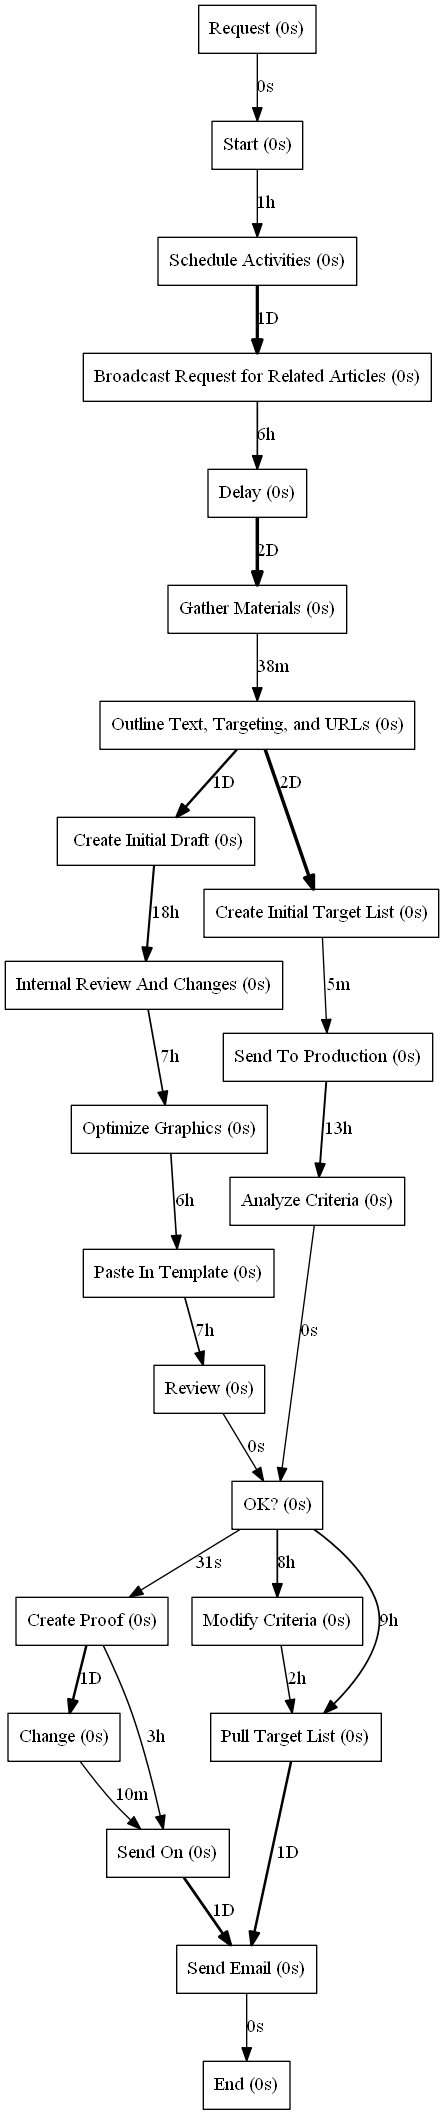

In [77]:
## Let's now take how much time it takes to travel between activities in our process

dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)
dfg_visualization.save(gviz, "_images/Direct flows graph performance.png")

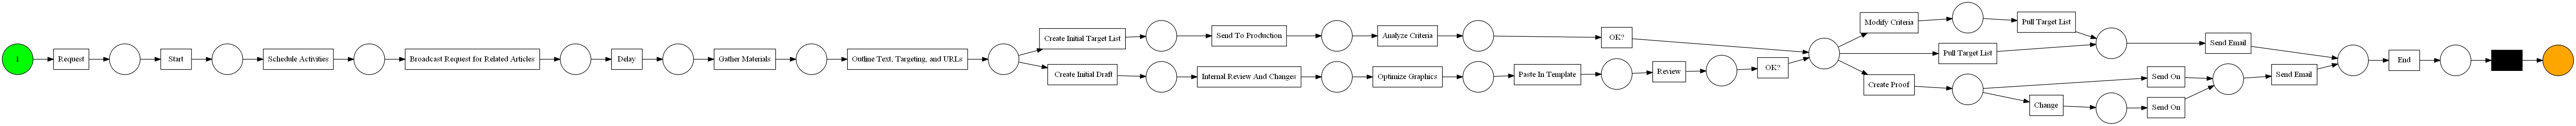

In [78]:
# Convert Directly-Follows Graph to a Workflow Net

net, im, fm = dfg_mining.apply(dfg)
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)
pn_visualizer.save(gviz, "_images/Workflow Net.png")